**Problem definition**

AirBnB is an online marketplace and hospitality service for short-term lodging, it was founded in 2008 by a group of three men  Brian Chesky, Joe Gebbia, and Nathan Blecharczyk as AirBed & Breakfast, As the years went by, the share of professional hospitality providers has significantly increased and is now crowding out the private providers, threatening AirBnB’s value proposition of offering unique service and personal touch. Because of this, the marketing department decided to run a campaign to attract more private providers. To achieve this, they requested me as a senior data analylst to come up with a pricing model that can effectively predict the Rental room and can help hosts, travelers, and also the business in devising profitable strategie.

**Questions to be answered**

*  To provides interesting insights that can benefit a host looking to maximize their profits
*   To come up with a pricing model that can effectively predict the Rent for accommodation and can help hosts, travelers, and also the business in devising profitable strategies.

**Data Background and context**

The data is collected from the AirBnB website. The considered dataset contains 74111 entries with 11 of both dependant and  independent variables, The data contains information about the different types of rental rooms offered by Airbnb over a fixed period of time.

**Univariate analysis**

This is the most basic form of data analysis technique, we shall perform it to understand the data contained by individual variable(one variable), To do this, we shall first use describe function to get the descriptive statistics of continuous variables then use the different plots to help us carry out the analysis.

**Bivariate analysis**

This analysis is slightly more analytical than Univariate analysis. We will use it to undertake comparsion between the data. To acheive this, we will first use the corr function to construct the correlation matrix to understand the relationship between the contionuous variables.






**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
pd.set_option('display.float_format', lambda x: '%.3f' % x) # to display numbers in digits

# To build linear model for prediction
from sklearn.linear_model import LinearRegression

# To check model performance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Forward Feature Selection
import joblib

import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading dataset

from google.colab import files
uploaded = files.upload()

Saving AirBNB.csv to AirBNB.csv


In [3]:
# reading dataset

# import io
# AirBNB = pd.read_csv(io.BytesIO(uploaded['AirBNB.csv']))

AirBNB = pd.read_csv("AirBNB.csv")


In [4]:
# getting the shape of the data

AirBNB.shape

(74111, 11)

In [5]:
 # To get the same random results every time it runs

np.random.seed(1)
AirBNB.sample(n=5)

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
56850,13586614,Entire home/apt,5.000,2.000,strict,False,f,100.000,2.000,3.000,7.409
68140,18222981,Private room,3.000,1.000,strict,True,f,95.000,1.000,2.000,4.605
23189,13915528,Entire home/apt,2.000,1.000,strict,True,f,95.000,1.000,2.000,4.094
47255,7122067,Private room,1.000,1.000,flexible,False,f,100.000,1.000,1.000,4.317
45933,12384924,Entire home/apt,5.000,2.000,strict,True,f,95.000,2.000,3.000,5.434




*   The id column will not be a significant factor in the prediction of the rental price since its just an index for data entry  rental price.

In [6]:
AirBNB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   room_type             74106 non-null  object 
 2   accommodates          74108 non-null  float64
 3   bathrooms             73908 non-null  float64
 4   cancellation_policy   74103 non-null  object 
 5   cleaning_fee          74107 non-null  object 
 6   instant_bookable      74111 non-null  object 
 7   review_scores_rating  57389 non-null  float64
 8   bedrooms              74019 non-null  float64
 9   beds                  73980 non-null  float64
 10  log_price             74111 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 6.2+ MB





*   74111 Entries
*   Dataset has 7 numerical columns, and 4 columns defined as *object*
* We will have to change all the 'object' Dtypes to 'category'












In [7]:
# querying for total of null data in each column

AirBNB.isnull().sum()

id                          0
room_type                   5
accommodates                3
bathrooms                 203
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    16722
bedrooms                   92
beds                      131
log_price                   0
dtype: int64


There are alot of missing values as seen with review_score having the highest, this will be the hardness to fix since we do not know weather the score started from zero or some other figure 




In [8]:
# querying for duplicates

AirBNB[AirBNB.duplicated()].count()

id                      0
room_type               0
accommodates            0
bathrooms               0
cancellation_policy     0
cleaning_fee            0
instant_bookable        0
review_scores_rating    0
bedrooms                0
beds                    0
log_price               0
dtype: int64

As seen there is no duplicate data

In [9]:
# query for unique values

AirBNB.nunique()

id                      74111
room_type                   3
accommodates               16
bathrooms                  17
cancellation_policy         3
cleaning_fee                2
instant_bookable            2
review_scores_rating       54
bedrooms                   11
beds                       18
log_price                 767
dtype: int64


*  log_price has the second hidgest unique value count
* The most important ones are the 'category' Dtypes after we change them from objects 




In [10]:
# A quick summary of all the data columns

AirBNB.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,74111.000,NaN,NaN,NaN,11266617.102,6081734.887,344.000,6261964.500,12254147.000,16402260.500,21230903.000
room_type,74106,3,Entire home/apt,41308,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,74108.000,NaN,NaN,NaN,3.155,2.154,1.000,2.000,2.000,4.000,16.000
bathrooms,73908.000,NaN,NaN,NaN,1.235,0.582,0.000,1.000,1.000,1.000,8.000
cancellation_policy,74103,3,strict,32500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cleaning_fee,74107,2,True,54399,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instant_bookable,74111,2,f,54660,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_scores_rating,57389.000,NaN,NaN,NaN,94.067,7.837,20.000,92.000,96.000,100.000,100.000
bedrooms,74019.000,NaN,NaN,NaN,1.266,0.852,0.000,1.000,1.000,1.000,10.000
beds,73980.000,NaN,NaN,NaN,1.711,1.254,0.000,1.000,1.000,2.000,18.000


**Quick Insights**

* The most frequent room_type is *Entire home/apt*
* accommodates has average number of 3 guests, and 75% of the guests are group of 4
* One is the common number of bathrooms
* Most places are considering *strict* canellation_policy
* Most places are charging cleaning_fees
* instant_bookable is not preferred by most place-owners
* The average review_scores_rating is above 94%
* One is also the common number of beds
* log_price in average is 4.78 and goes up tp 7.60
* accommodates min is 1.0 to 16 max
* bathrooms min is 0 to 8 max
* review_scores_rating min is 20 to 100 max







In [11]:
# digging into the above inslight, looking at value counts for non-numeric features only

num_to_display = 10  
for colname in AirBNB.dtypes[AirBNB.dtypes == 'object'].index:
    val_counts = AirBNB[colname].value_counts(dropna=False) # including the null count
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f'Only displaying first {num_to_display} of {len(val_counts)} values.')
    print('\n\n') # just for more space between 

Entire home/apt    41308
Private room       30635
Shared room         2163
NaN                    5
Name: room_type, dtype: int64



strict      32500
flexible    22543
moderate    19060
NaN             8
Name: cancellation_policy, dtype: int64



True     54399
False    19708
NaN          4
Name: cleaning_fee, dtype: int64



f    54660
t    19451
Name: instant_bookable, dtype: int64





**Key Observations**



* Most of the home for rent are Entire home/apt at 41308
* About 32500 have a very strict cancellation policy
* About 54399 have a cleaning fee
* About 19451 have a instant bookalbe option




# Data Pre-Processing 

In [12]:
# query for Dtype

cols = AirBNB.select_dtypes(['object'])
cols.columns

Index(['room_type', 'cancellation_policy', 'cleaning_fee', 'instant_bookable'], dtype='object')

In [13]:
for i in cols.columns:
    AirBNB[i] = AirBNB[i].astype('category')

In [14]:
AirBNB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    74111 non-null  int64   
 1   room_type             74106 non-null  category
 2   accommodates          74108 non-null  float64 
 3   bathrooms             73908 non-null  float64 
 4   cancellation_policy   74103 non-null  category
 5   cleaning_fee          74107 non-null  category
 6   instant_bookable      74111 non-null  category
 7   review_scores_rating  57389 non-null  float64 
 8   bedrooms              74019 non-null  float64 
 9   beds                  73980 non-null  float64 
 10  log_price             74111 non-null  float64 
dtypes: category(4), float64(6), int64(1)
memory usage: 4.2 MB


**Converted all object datatypes to Category**

#### Missing Values

In [15]:
# Replacing all missing values with NaN

AirBNB = AirBNB.replace('?', np.nan)

In [16]:
AirBNB.sample(n=10)

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
59601,13567393,Entire home/apt,3.000,2.000,flexible,False,f,NaN,2.000,1.000,4.248
43446,17640554,Entire home/apt,4.000,1.000,strict,True,t,88.000,0.000,1.000,4.500
7997,600295,Entire home/apt,4.000,1.000,strict,True,f,100.000,2.000,2.000,5.298
17414,6079197,Private room,1.000,1.000,moderate,True,f,100.000,1.000,1.000,3.434
3957,1180537,Entire home/apt,8.000,2.000,strict,True,f,99.000,4.000,4.000,5.989
6033,19504042,Entire home/apt,2.000,1.500,moderate,True,f,100.000,1.000,1.000,4.787
29784,4802374,Private room,2.000,1.000,strict,True,f,100.000,1.000,1.000,4.443
19117,349841,Entire home/apt,3.000,1.000,flexible,True,f,NaN,1.000,1.000,5.142
23723,6741968,Private room,2.000,1.000,flexible,True,t,NaN,1.000,1.000,4.078
35746,6115291,Private room,2.000,2.000,moderate,True,f,97.000,1.000,1.000,4.443


In [17]:
# replacing the nan value in review_scares_ratig with its minimum value
AirBNB['review_scores_rating'] = AirBNB['review_scores_rating'].fillna(AirBNB['review_scores_rating'].min())

In [18]:
series = pd.isnull(AirBNB["review_scores_rating"]) 



*   Replaced all NaN values with the min for review_scores_rating
*   My thought is that if they are missing or have no reviews then the min will not skew the data to 0 since there are 16722 missing values




In [19]:
AirBNB[['bathrooms', 'bedrooms', 'beds', 'accommodates']] = AirBNB[['bathrooms', 'bedrooms', 'beds', 'accommodates']].fillna(AirBNB[['bathrooms', 'bedrooms', 'beds', 'accommodates']].median())


In [20]:
AirBNB.sample(n=10)

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
41874,4395384,Private room,2.000,1.000,strict,False,f,100.000,1.000,1.000,4.007
2342,2105487,Entire home/apt,4.000,2.000,strict,True,f,86.000,2.000,2.000,5.242
21809,9040214,Entire home/apt,8.000,4.000,moderate,True,f,100.000,4.000,5.000,5.521
37956,7559867,Entire home/apt,6.000,1.000,flexible,True,f,92.000,3.000,3.000,5.298
53994,10469455,Private room,2.000,1.000,strict,False,f,90.000,4.000,4.000,3.850
10647,8054651,Private room,1.000,1.500,flexible,False,f,100.000,1.000,1.000,3.912
66134,19252113,Private room,1.000,1.000,moderate,True,f,97.000,1.000,1.000,4.554
15207,14821542,Entire home/apt,4.000,1.000,flexible,False,f,20.000,2.000,2.000,5.298
62184,12930677,Entire home/apt,3.000,1.000,moderate,True,t,84.000,1.000,2.000,4.787
35808,9391509,Entire home/apt,4.000,2.000,strict,True,f,93.000,2.000,2.000,5.298


**Replaced all NaN values with the median for columns accommodates,bathrooms, bedrooms,beds**



#### Replacing categorical variables missing values 

In [21]:
bool_series = pd.isnull(AirBNB["room_type"]) 

In [22]:
AirBNB[bool_series] 

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
141,457555,NaN,1.000,1.000,flexible,False,f,20.000,1.000,1.000,5.521
167,6374167,NaN,5.000,1.000,strict,True,f,97.000,2.000,3.000,5.576
195,19981334,NaN,2.000,1.000,moderate,True,f,99.000,1.000,1.000,3.555
255,455801,NaN,4.000,1.000,moderate,True,f,91.000,1.000,2.000,4.419
552,4874722,NaN,1.000,2.500,strict,True,t,100.000,1.000,1.000,4.489


In [23]:
# Replaced the 5 NaN values with Entire home/apt because they have the majority 


AirBNB["room_type"].fillna("Entire home/apt", inplace = True)

In [24]:
# checking the result
AirBNB[bool_series] 

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
141,457555,Entire home/apt,1.000,1.000,flexible,False,f,20.000,1.000,1.000,5.521
167,6374167,Entire home/apt,5.000,1.000,strict,True,f,97.000,2.000,3.000,5.576
195,19981334,Entire home/apt,2.000,1.000,moderate,True,f,99.000,1.000,1.000,3.555
255,455801,Entire home/apt,4.000,1.000,moderate,True,f,91.000,1.000,2.000,4.419
552,4874722,Entire home/apt,1.000,2.500,strict,True,t,100.000,1.000,1.000,4.489


In [25]:
# querying for null values in cancellation_policy
bool_series = pd.isnull(AirBNB["cancellation_policy"]) 
AirBNB[bool_series] 

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
205,2754149,Private room,2.000,1.000,NaN,NaN,t,96.000,1.000,1.000,4.585
209,14783267,Entire home/apt,2.000,1.000,NaN,NaN,f,93.000,1.000,1.000,4.787
232,12265833,Entire home/apt,2.000,1.000,NaN,NaN,f,100.000,1.000,1.000,5.298
348,18388570,Entire home/apt,2.000,1.000,NaN,False,f,20.000,0.000,1.000,4.605
349,20620600,Private room,2.000,1.000,NaN,True,f,20.000,1.000,1.000,5.220
399,2484207,Entire home/apt,2.000,1.000,NaN,NaN,t,100.000,1.000,1.000,5.704
454,7939196,Entire home/apt,2.000,1.000,NaN,True,f,82.000,1.000,3.000,4.868
574,169306,Entire home/apt,3.000,1.000,NaN,False,f,20.000,0.000,2.000,4.317


In [26]:
# Replacing the 8 missing values with strict since it has the majority count in cancellation_policy

AirBNB["cancellation_policy"].fillna("strict", inplace = True)

In [27]:
AirBNB[bool_series] 

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
205,2754149,Private room,2.000,1.000,strict,NaN,t,96.000,1.000,1.000,4.585
209,14783267,Entire home/apt,2.000,1.000,strict,NaN,f,93.000,1.000,1.000,4.787
232,12265833,Entire home/apt,2.000,1.000,strict,NaN,f,100.000,1.000,1.000,5.298
348,18388570,Entire home/apt,2.000,1.000,strict,False,f,20.000,0.000,1.000,4.605
349,20620600,Private room,2.000,1.000,strict,True,f,20.000,1.000,1.000,5.220
399,2484207,Entire home/apt,2.000,1.000,strict,NaN,t,100.000,1.000,1.000,5.704
454,7939196,Entire home/apt,2.000,1.000,strict,True,f,82.000,1.000,3.000,4.868
574,169306,Entire home/apt,3.000,1.000,strict,False,f,20.000,0.000,2.000,4.317


In [28]:
AirBNB['cleaning_fee'].value_counts()

True     54399
False    19708
Name: cleaning_fee, dtype: int64

In [29]:
# Replacing all null values with True since it has the majority count in the cleaning_fee column

AirBNB.cleaning_fee = AirBNB.cleaning_fee.fillna(True)

In [30]:
# Replacing all t with True and f with False in instant_bookable column**

AirBNB['instant_bookable'] = AirBNB['instant_bookable'].map(
                   {'t':True ,'f':False})

In [31]:
# checking if all missing values have been replaced

AirBNB.isnull().sum()

id                      0
room_type               0
accommodates            0
bathrooms               0
cancellation_policy     0
cleaning_fee            0
instant_bookable        0
review_scores_rating    0
bedrooms                0
beds                    0
log_price               0
dtype: int64

### EDA

## Univariate analysis


In [32]:
AirBNB.describe()

,id,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price
count,74111.000,74111.000,74111.000,74111.000,74111.000,74111.000,74111.000
mean,11266617.102,3.155,1.235,77.355,1.265,1.710,4.782
std,6081734.887,2.154,0.581,31.719,0.852,1.253,0.717
min,344.000,1.000,0.000,20.000,0.000,0.000,0.000
25%,6261964.500,2.000,1.000,80.000,1.000,1.000,4.317
50%,12254147.000,2.000,1.000,94.000,1.000,1.000,4.710
75%,16402260.500,4.000,1.000,99.000,1.000,2.000,5.220
max,21230903.000,16.000,8.000,100.000,10.000,18.000,7.600


In [33]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # creating boxplot and using a star to indicate the mean of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Adding mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Adding median to the histogram

In [34]:
def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
        
    plt.show() # show the plot

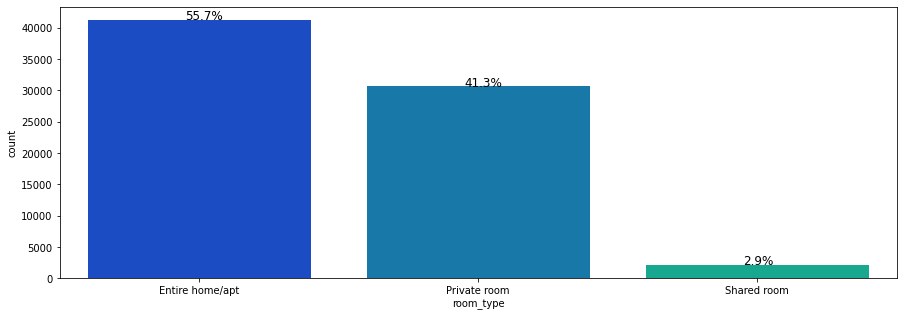

In [35]:
plt.figure(figsize=(15,5))
ax = sns.countplot(AirBNB["room_type"],palette='winter')
perc_on_bar(ax,AirBNB["room_type"])

**55.7% are entire home/apt, 41.3% are private room and 2.9% are shared room**

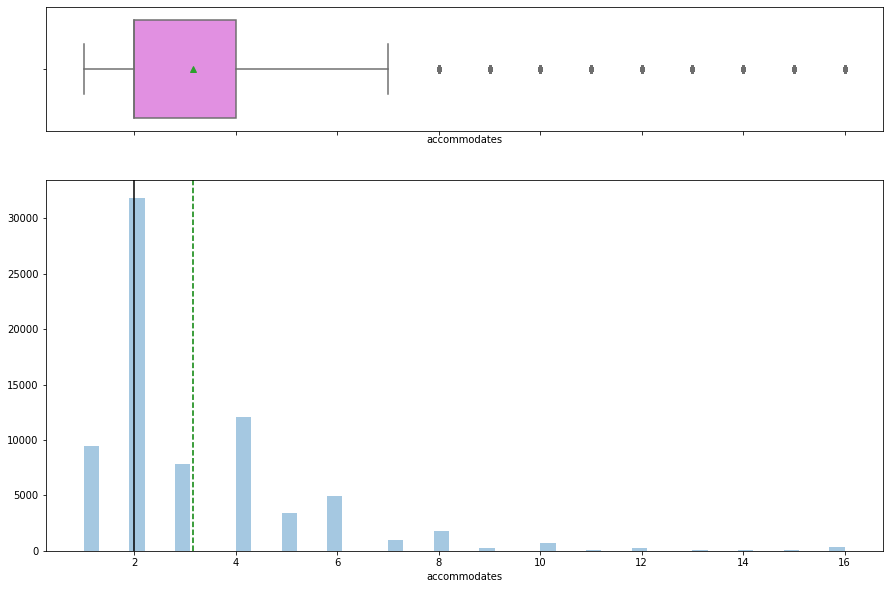

In [36]:
histogram_boxplot(AirBNB['accommodates'])

**The max accommodations is 16 with an averge of 3**

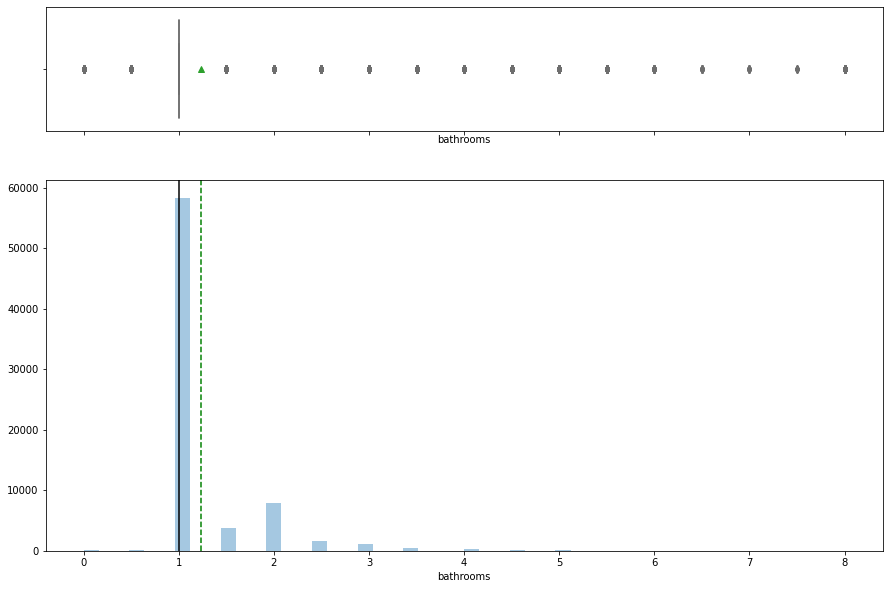

In [37]:
histogram_boxplot(AirBNB['bathrooms'])

**The max bathrooms is 5 with an averge of 1.2**

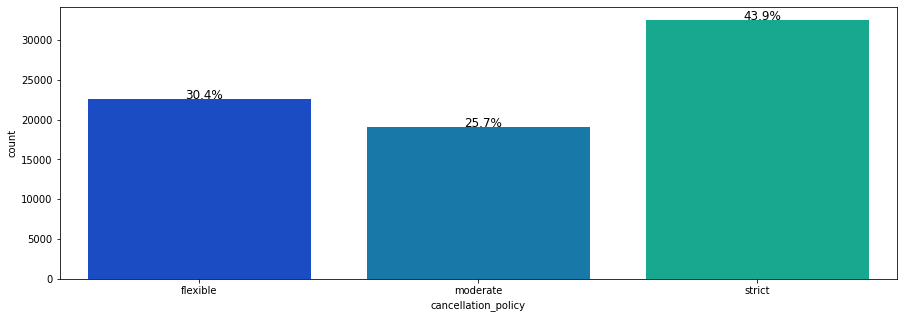

In [38]:

plt.figure(figsize=(15,5))
ax = sns.countplot(AirBNB["cancellation_policy"],palette='winter')
perc_on_bar(ax,AirBNB["cancellation_policy"])

**About 30.4 % of the cancellation policy is flexible and 44% is strict**

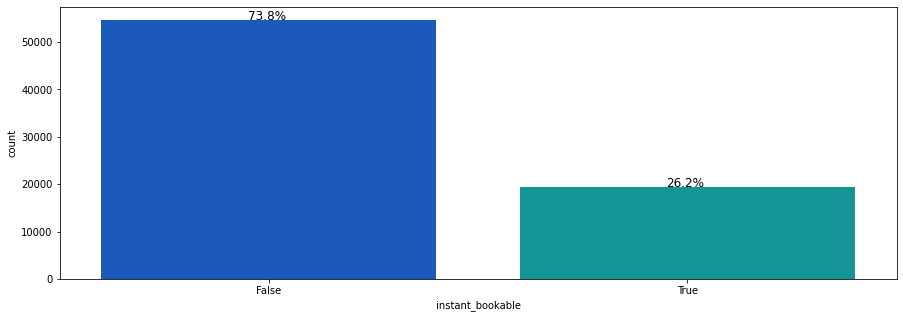

In [39]:
plt.figure(figsize=(15,5))
ax = sns.countplot(AirBNB["instant_bookable"],palette='winter')
perc_on_bar(ax,AirBNB["instant_bookable"])

**About 78.3 percent of the rentals are not instant bookable**

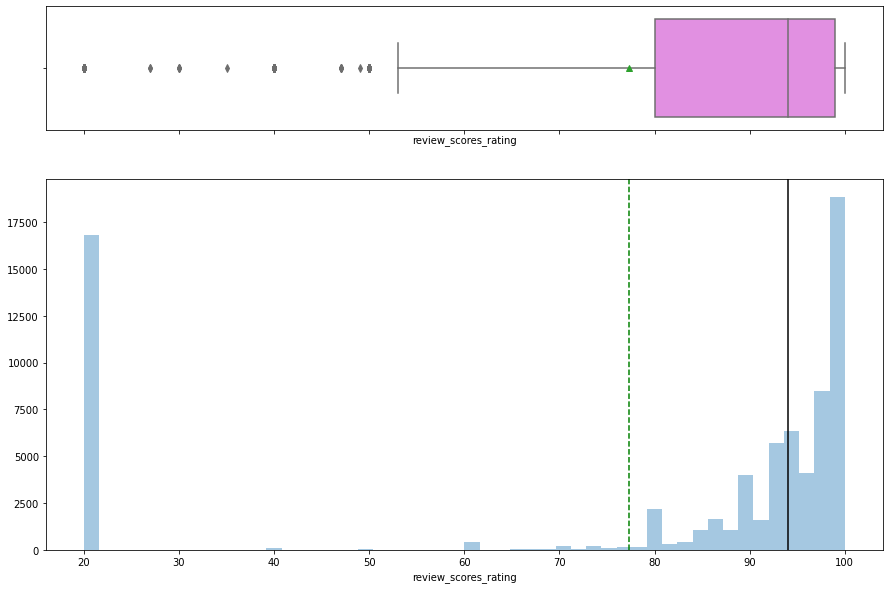

In [40]:
histogram_boxplot(AirBNB['review_scores_rating'])

**All the missing values set to 20 the averge is 78%**

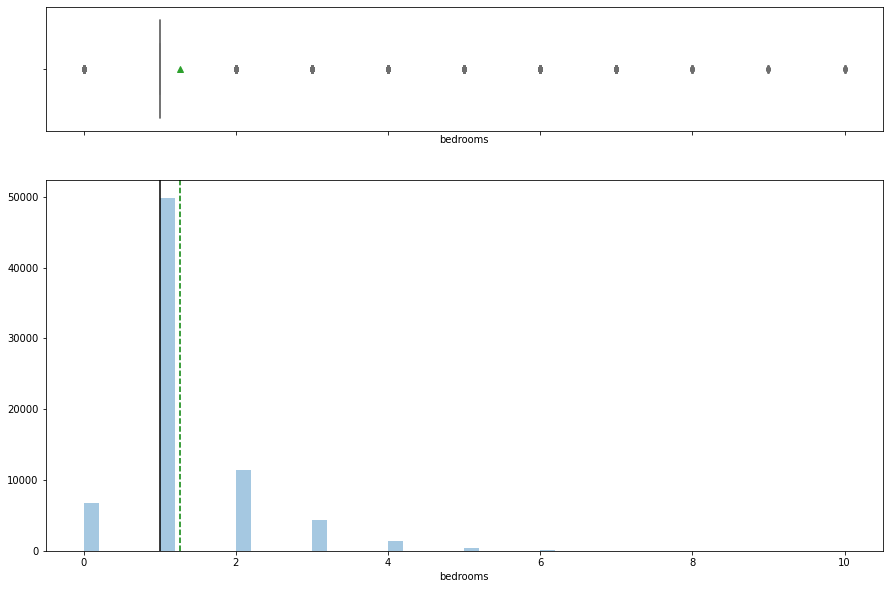

In [41]:
histogram_boxplot(AirBNB['bedrooms'])

*   The averge bathrooms in a rental is 1.6
*   Alot of outliers

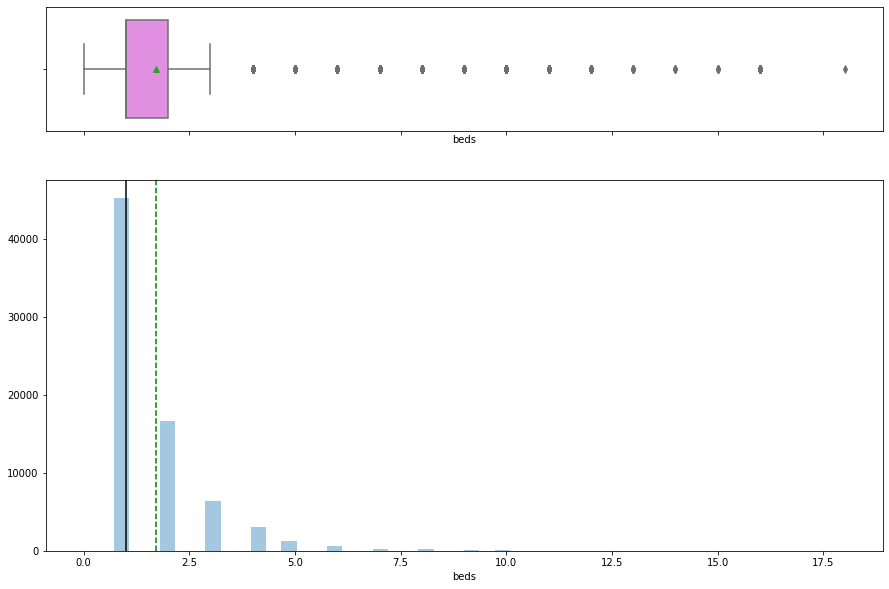

In [42]:
histogram_boxplot(AirBNB['beds'])


*  The averge beds in a rental is 1.5
*   Alot of outliers



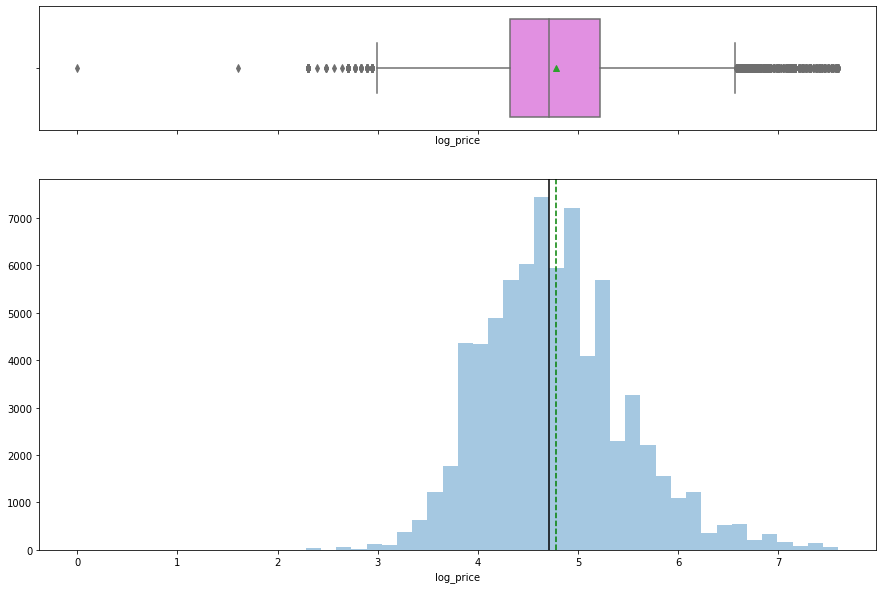

In [43]:
histogram_boxplot(AirBNB['log_price'])

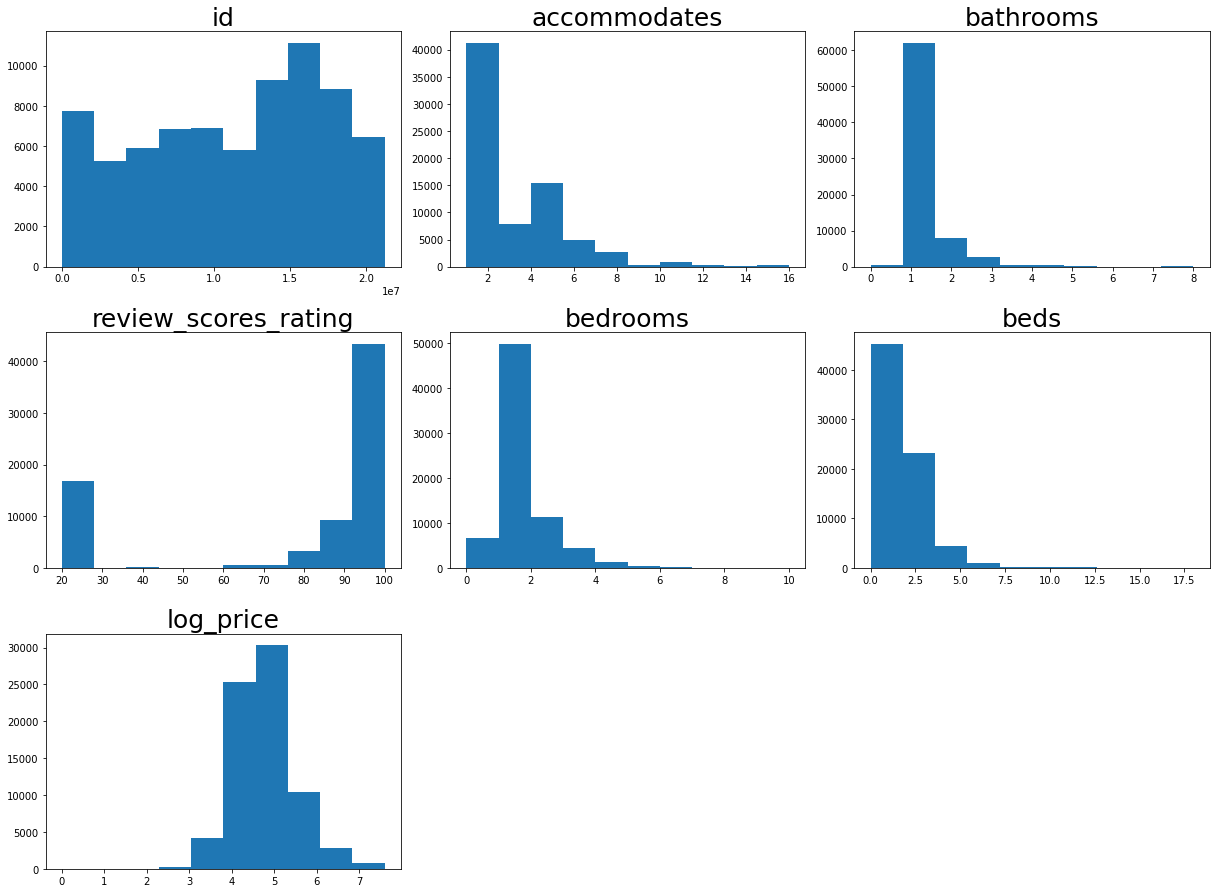

In [44]:
# ploting histogram chart of all plots
from scipy.stats import norm
all_col = AirBNB.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(17,75))

for i in range(len(all_col)):
    plt.subplot(18,3,i+1)
    plt.hist(AirBNB[all_col[i]])
    #sns.displot(df[all_col[i]], kde=True)
    plt.tight_layout()
    plt.title(all_col[i],fontsize=25)
    

plt.show()

## Bivariate analysis

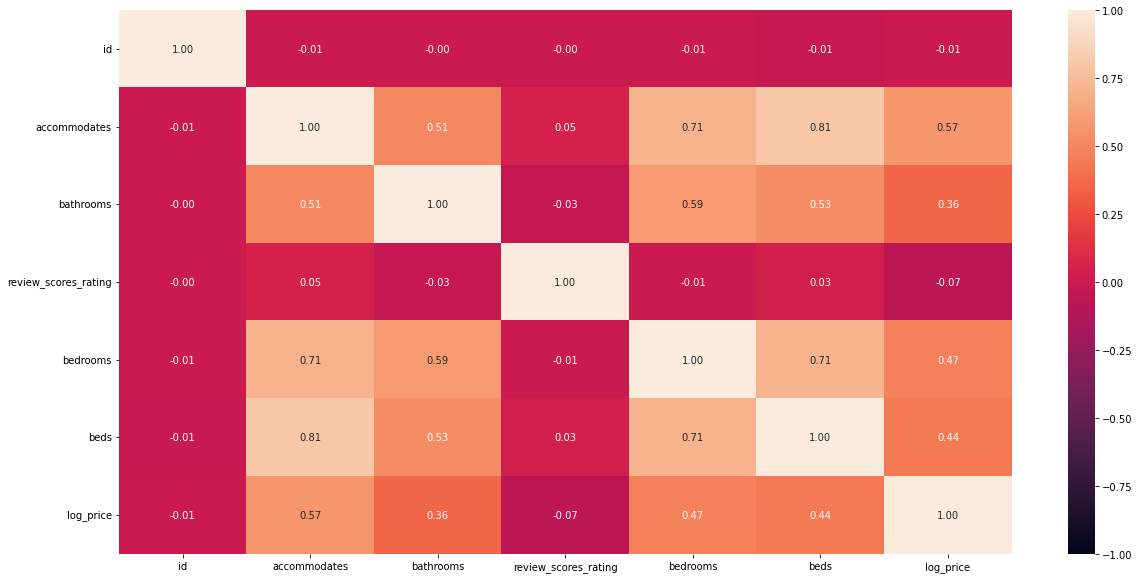

In [45]:
plt.figure(figsize=(20,10))
sns.heatmap(AirBNB.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f')
plt.show()

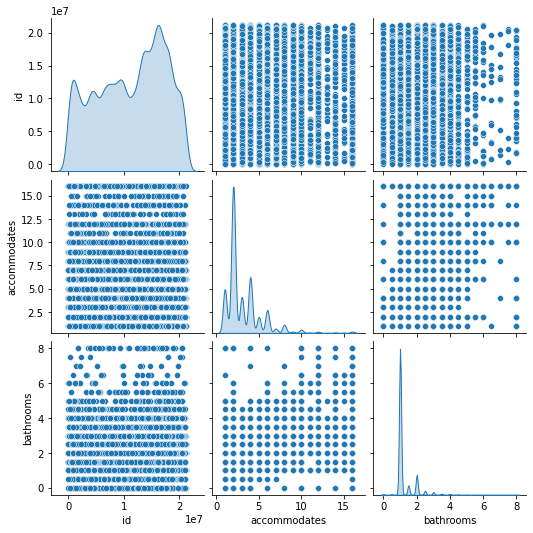

In [46]:
AirBNB_attr = AirBNB.iloc[:, 0:7]
sns.pairplot(AirBNB_attr, diag_kind='kde')   # to plot density curve instead of histogram on the diag



*   there  is a big Correlation between beds and accommodates, which makes sense because guest need a bed to sleep.
*   There is also another Correlation between bedroom and beds.



In [47]:
AirBNB.corr(method ='pearson') 

,id,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price
id,1.000,-0.006,-0.004,-0.004,-0.008,-0.009,-0.007
accommodates,-0.006,1.000,0.506,0.050,0.709,0.810,0.568
bathrooms,-0.004,0.506,1.000,-0.025,0.590,0.526,0.355
review_scores_rating,-0.004,0.050,-0.025,1.000,-0.008,0.035,-0.067
bedrooms,-0.008,0.709,0.590,-0.008,1.000,0.709,0.473
beds,-0.009,0.810,0.526,0.035,0.709,1.000,0.442
log_price,-0.007,0.568,0.355,-0.067,0.473,0.442,1.000


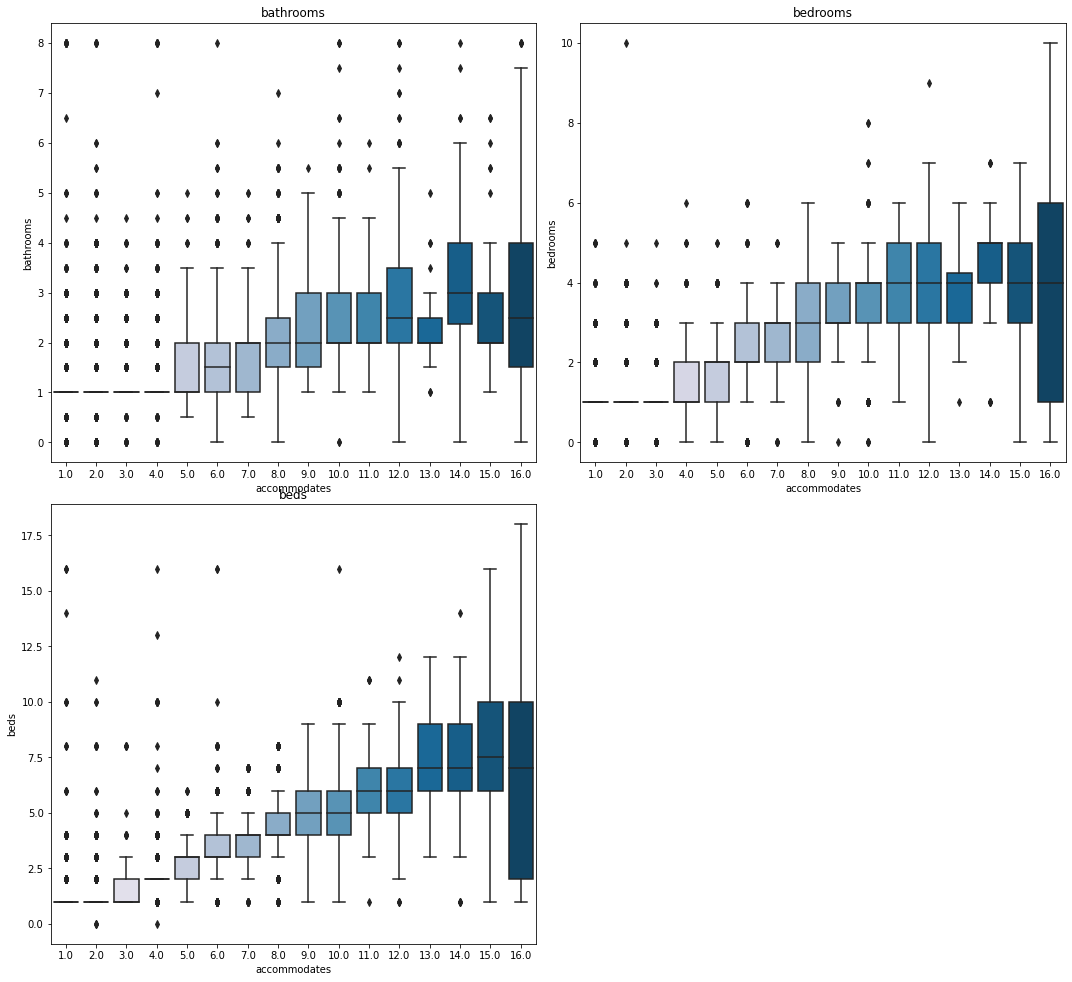

In [48]:
cols = AirBNB[['bathrooms','bedrooms','beds']].columns.tolist()
plt.figure(figsize=(15,20))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(AirBNB["accommodates"],AirBNB[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()



*   lower outliers exist in log_price, review_scores_rating,
*   higher outliers seen in beds,bedrooms,bathrooms, accommodates



In [49]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,AirBNB['accommodates'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,AirBNB['accommodates'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

accommodates      1.0    2.0   3.0    4.0   5.0   6.0  7.0   8.0  9.0  10.0  \
room_type                                                                     
Entire home/apt   739  12019  5808  10462  3206  4720  907  1739  262   663   
Private room     7551  19194  1879   1480   216   196   30    37    4    18   
Shared room      1144    643   106    124    22    52    9    19    4    20   
All              9434  31856  7793  12066  3444  4968  946  1795  270   701   

accommodates     11.0  12.0  13.0  14.0  15.0  16.0    All  
room_type                                                   
Entire home/apt    77   258    35    97    49   272  41313  
Private room        1     4     1     6     4    14  30635  
Shared room         1     2     0     1     1    15   2163  
All                79   264    36   104    54   301  74111  
------------------------------------------------------------------------------------------------------------------------


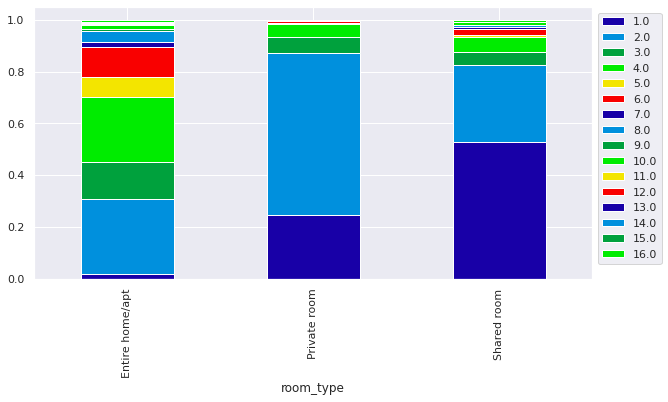

In [50]:
stacked_plot(AirBNB['room_type'])

accommodates          1.0    2.0   3.0    4.0   5.0   6.0  7.0   8.0  9.0  \
cancellation_policy                                                         
flexible             4395  10950  2083   2940   658   905  138   262   33   
moderate             1967   8903  2211   3216   865  1102  195   345   50   
strict               3072  12003  3499   5910  1921  2961  613  1188  187   
All                  9434  31856  7793  12066  3444  4968  946  1795  270   

accommodates         10.0  11.0  12.0  13.0  14.0  15.0  16.0    All  
cancellation_policy                                                   
flexible               93     4    24     2    13     6    37  22543  
moderate               97     8    37     8    18     4    34  19060  
strict                511    67   203    26    73    44   230  32508  
All                   701    79   264    36   104    54   301  74111  
---------------------------------------------------------------------------------------------------------------

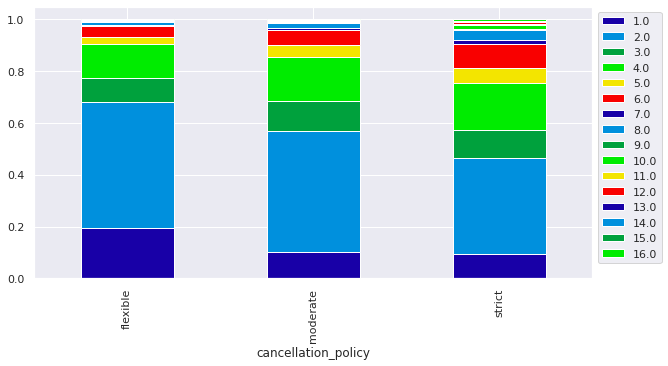

In [51]:
stacked_plot(AirBNB['cancellation_policy'])

### detecting Outlier 
 we will be using IQR(interquartile Range) to detect and treat the outliers in the different columns













##### Treatment for log_price

In [52]:
np.random.seed(1)
x1 = np.random.normal(size=1000)
x2 = np.random.lognormal(size=1000)

def frac_outside_1pt5_IQR(x):
    length = 1.5 * np.diff(np.quantile(x, [.25, .75]))
    return np.mean(np.abs(x - np.median(x)) > length)

print(frac_outside_1pt5_IQR(x1))
print(frac_outside_1pt5_IQR(x2))

0.05
0.132


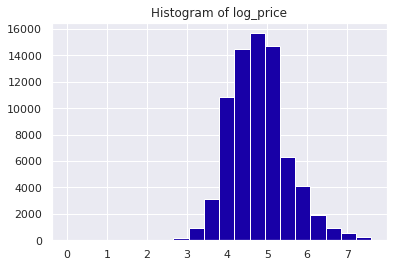

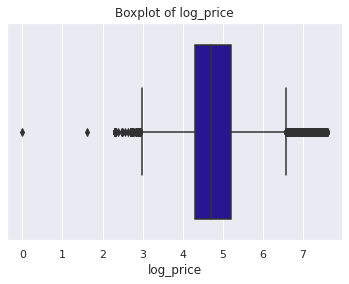

In [53]:
plt.hist(AirBNB['log_price'], 20)
plt.title('Histogram of log_price')
plt.show()

sns.boxplot(AirBNB['log_price'])
plt.title('Boxplot of log_price')
plt.show()

In [54]:
quartiles = np.quantile(AirBNB['log_price'][AirBNB['log_price'].notnull()], [.25, .75])
log_price_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {log_price_4iqr}')
outlier_log_price = AirBNB.loc[np.abs(AirBNB['log_price'] - AirBNB['log_price'].median()) > log_price_4iqr, 'log_price']
outlier_log_price

Q1 = 4.317488114, Q3 = 5.220355825, 4*IQR = 3.611470844000003


11632   0.000
Name: log_price, dtype: float64

In [55]:
AirBNB.drop(outlier_log_price.index, axis=0, inplace=True)

**Treatment for outliers in review_scores_rating**

In [56]:
def frac_outside_1pt5_IQR(x):
    length = 1.5 * np.diff(np.quantile(x, [.25, .75]))
    return np.mean(np.abs(x - np.median(x)) > length)

print(frac_outside_1pt5_IQR(x1))
print(frac_outside_1pt5_IQR(x2))

0.05
0.132


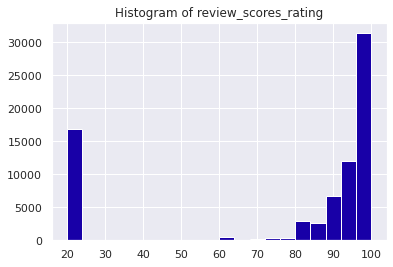

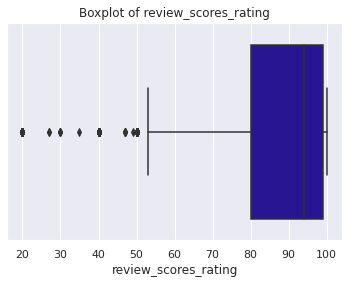

In [57]:
plt.hist(AirBNB['review_scores_rating'], 20)
plt.title('Histogram of review_scores_rating')
plt.show()

sns.boxplot(AirBNB['review_scores_rating'])
plt.title('Boxplot of review_scores_rating')
plt.show()

In [58]:
quartiles = np.quantile(AirBNB['review_scores_rating'][AirBNB['review_scores_rating'].notnull()], [.25, .75])
review_scores_rating_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {review_scores_rating_4iqr}')
outlier_review_scores_rating = AirBNB.loc[np.abs(AirBNB['review_scores_rating'] - AirBNB['review_scores_rating'].median()) > review_scores_rating_4iqr, 'review_scores_rating']
outlier_review_scores_rating

Q1 = 80.0, Q3 = 99.0, 4*IQR = 76.0


Series([], Name: review_scores_rating, dtype: float64)

In [59]:
AirBNB.drop(outlier_review_scores_rating.index, axis=0, inplace=True)

**Treatment for the outliers in accommodates**

In [60]:
def frac_outside_1pt5_IQR(x):
    length = 1.5 * np.diff(np.quantile(x, [.25, .75]))
    return np.mean(np.abs(x - np.median(x)) > length)

print(frac_outside_1pt5_IQR(x1))
print(frac_outside_1pt5_IQR(x2))

0.05
0.132


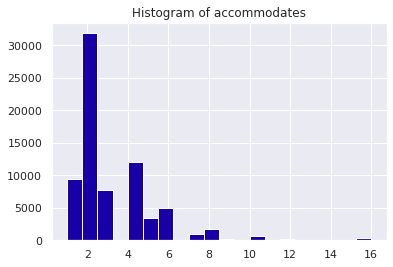

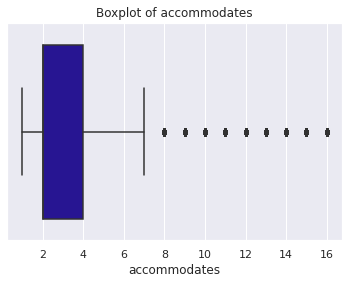

In [61]:
plt.hist(AirBNB['accommodates'], 20)
plt.title('Histogram of accommodates')
plt.show()

sns.boxplot(AirBNB['accommodates'])
plt.title('Boxplot of accommodates')
plt.show()

In [62]:
quartiles = np.quantile(AirBNB['accommodates'][AirBNB['accommodates'].notnull()], [.25, .75])
accommodates_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {accommodates_4iqr}')
outlier_accommodates = AirBNB.loc[np.abs(AirBNB['accommodates'] - AirBNB['accommodates'].median()) > accommodates_4iqr, 'accommodates']
outlier_accommodates

Q1 = 2.0, Q3 = 4.0, 4*IQR = 8.0


306     16.000
457     16.000
482     11.000
569     16.000
642     12.000
         ...  
73669   12.000
73695   12.000
73957   14.000
73980   15.000
74081   16.000
Name: accommodates, Length: 838, dtype: float64

In [63]:
AirBNB.drop(outlier_accommodates.index, axis=0, inplace=True)

**Treatment for the outliers in beds**

In [64]:
def frac_outside_1pt5_IQR(x):
    length = 1.5 * np.diff(np.quantile(x, [.25, .75]))
    return np.mean(np.abs(x - np.median(x)) > length)

print(frac_outside_1pt5_IQR(x1))
print(frac_outside_1pt5_IQR(x2))

0.05
0.132


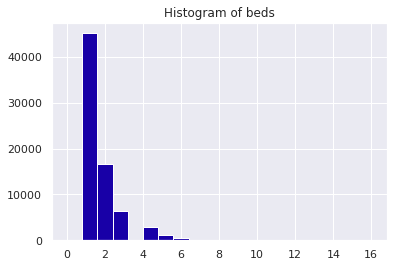

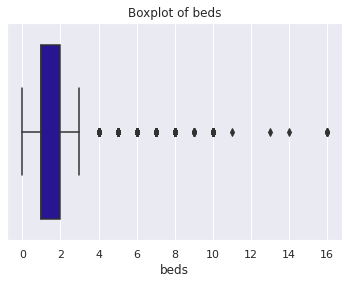

In [65]:
plt.hist(AirBNB['beds'], 20)
plt.title('Histogram of beds')
plt.show()

sns.boxplot(AirBNB['beds'])
plt.title('Boxplot of beds')
plt.show()

In [66]:
quartiles = np.quantile(AirBNB['beds'][AirBNB['beds'].notnull()], [.25, .75])
beds_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {beds_4iqr}')
outlier_beds = AirBNB.loc[np.abs(AirBNB['beds'] - AirBNB['beds'].median()) > beds_4iqr, 'beds']
outlier_beds

Q1 = 1.0, Q3 = 2.0, 4*IQR = 4.0


42       7.000
81       6.000
547      6.000
756      8.000
798      6.000
         ...  
73768    6.000
73804    6.000
73842    7.000
73899    6.000
74102   10.000
Name: beds, Length: 781, dtype: float64

In [67]:
AirBNB.drop(outlier_beds.index, axis=0, inplace=True)



*   **There are lower outliers in log_price, review_scores_rating,**
*   **There are higher outliers in beds,bedrooms,bathrooms, accommodates**
*   **Used the IQR to treat the outlierst**








## Distributions

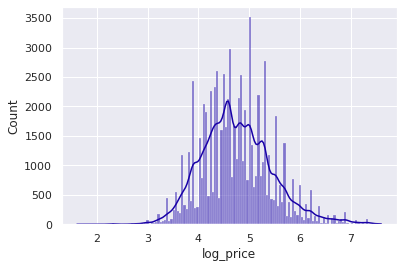

In [68]:
sns.histplot(AirBNB["log_price"], kde=True)

### Correlation between numeric Variables

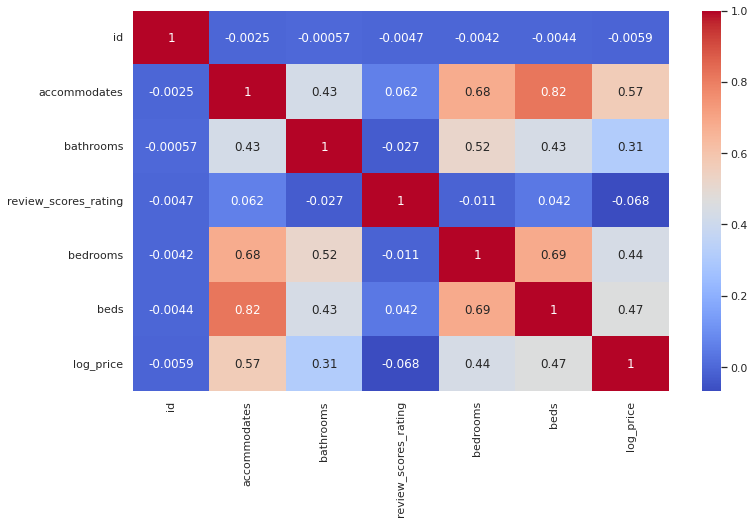

In [69]:
plt.figure(figsize=(12, 7))
sns.heatmap(AirBNB.corr(), annot=True, cmap="coolwarm")



*   **As we can see there big Correlation between beds and accommodates, which makes sense because they need a bed to sleep.**
*   **There is also a Correlation between bedroom and beds.**



# Linear Model Building


In [70]:
# Defining dependent variable
ind_vars = AirBNB.drop(["accommodates", "log_price"], axis=1)
dep_var = AirBNB[["log_price"]] 

print(ind_vars.head())
print(dep_var.head())

         id        room_type  bathrooms cancellation_policy cleaning_fee  \
0   6901257  Entire home/apt      1.000              strict         True   
1   6304928  Entire home/apt      1.000              strict         True   
2   7919400  Entire home/apt      1.000            moderate         True   
3  13418779  Entire home/apt      1.000            flexible         True   
4   3808709  Entire home/apt      1.000            moderate         True   

  instant_bookable  review_scores_rating  bedrooms  beds  
0            False               100.000     1.000 1.000  
1             True                93.000     3.000 3.000  
2             True                92.000     1.000 3.000  
3            False                20.000     2.000 2.000  
4             True                40.000     0.000 1.000  
   log_price
0      5.011
1      5.130
2      4.977
3      6.620
4      4.745


### Creating dummy variables
for columns that can not be read into an equation hence need to be converted to interger


In [71]:
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
        drop_first=True,
    )
    return x


ind_vars_num = encode_cat_vars(ind_vars)
ind_vars_num.head()

,id,bathrooms,review_scores_rating,bedrooms,beds,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,instant_bookable_True
0,6901257,1.000,100.000,1.000,1.000,0,0,0,1,1,0
1,6304928,1.000,93.000,3.000,3.000,0,0,0,1,1,1
2,7919400,1.000,92.000,1.000,3.000,0,0,1,0,1,1
3,13418779,1.000,20.000,2.000,2.000,0,0,0,0,1,0
4,3808709,1.000,40.000,0.000,1.000,0,0,1,0,1,1


### Split the data into train and test

In [72]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    ind_vars_num, dep_var, test_size=0.3, random_state=1
)


In [73]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in train data =", x_test.shape[0])

Number of rows in train data = 50743
Number of rows in train data = 21748


### Fitting the linear model


In [74]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train,y_train)

LinearRegression()

In [75]:
coef_AirBNB = pd.DataFrame(np.append(lin_reg_model.coef_.flatten(), lin_reg_model.intercept_), \
                       index=x_train.columns.tolist()+['Intercept'], columns=['Coefficients'])
coef_AirBNB

,Coefficients
id,-0.000
bathrooms,0.157
review_scores_rating,-0.002
bedrooms,0.184
beds,0.057
room_type_Private room,-0.692
room_type_Shared room,-1.167
cancellation_policy_moderate,-0.015
cancellation_policy_strict,0.026
cleaning_fee_True,-0.032


bathrooms come out to be very signifcant, as expected. There are two variable -review_scores_rating and room_type_Private room. As these two increase, the total value of the rental decreases, as visible in the negative coefficient sign.

##The model performance Evaluation on the different performance metrics



In [76]:
# difference performance metric
# R Square(R2),
# Adjusted R square(R^2), 
# mean absolute error(MAE)
# root mean square error(RMSE)
# MAPE (mean absolute performance error)
def mape(targets, predictions):
    return np.mean(np.abs((targets - predictions)) / targets) * 100

# Adjusted R^2
def adj_r2(ind_vars, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = ind_vars.shape[0]
    k = ind_vars.shape[1]
    return 1-((1-r2)*(n-1)/(n-k-1))

# Model performance check
def model_perf(model, inp, out):

    y_pred = np.exp(model.predict(inp))
    y_act = np.exp(out.values)

    return pd.DataFrame({
                "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
                "MAE": mean_absolute_error(y_act, y_pred),
                "MAPE": mape(y_act, y_pred),
                "R^2": r2_score(y_act, y_pred),
                "Adjusted R^2": adj_r2(inp, y_act, y_pred)
           }, index=[0])

In [77]:
# Checking model performance on train set
print('Training Performance\n')
print(model_perf(lin_reg_model, x_train, y_train))

Training Performance

     RMSE    MAE   MAPE   R^2  Adjusted R^2
0 127.706 61.124 40.318 0.320         0.320


In [78]:
# Checking model performance on test set
print('Test Performance\n')
print(model_perf(lin_reg_model, x_test, y_test))


Test Performance

     RMSE    MAE   MAPE   R^2  Adjusted R^2
0 125.201 60.265 39.882 0.347         0.347




* MAE having a high score means we have a bad performance on our model
* Since the sample are less it is harder to reconstruct the error distribution using RMSE which is the reason it is so high in this case.
* The Mape value being high also point that our prediction is not so accurate, the closer mape is to zero, the better the prediction
* R^2 is low and that is because our dataset or the data points are distributed with low variance and should be closer to 1 
* Adjusted R-squared is low because we dont have many features ie the effective features to train the model.
* My suggestion is, the more the features, the better the treatment of the outliers which will inturn improve our score


**Forward Feature Selection**

In [79]:
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

reg = LinearRegression()

# Build step forward feature selection
sfs1 = sfs(reg,k_features = x_train.shape[1], forward=True,   # k_features denotes "Number of features to select"
           floating=False, scoring= 'r2',
           verbose=2, cv=5)

# Perform SFFS
sfs1 = sfs1.fit(x_train, y_train)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.5s finished

[2022-12-11 09:10:52] Features: 1/11 -- score: 0.2836540592266819[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.8s finished

[2022-12-11 09:10:53] Features: 2/11 -- score: 0.38643266290376604[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.8s finished

[2022-12-11 09:10:53] Features: 3/11 -- score: 0.45630911159279036[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done

In [80]:
reg = LinearRegression()

# # Build step forward feature selection
sfs1 = sfs(reg, k_features = 11, forward=True,
           floating=False, scoring='r2',
           verbose=2, cv=5)

# Perform SFFS
sfs1 = sfs1.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.4s finished

[2022-12-11 09:10:59] Features: 1/11 -- score: 0.2836540592266819[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.8s finished

[2022-12-11 09:11:00] Features: 2/11 -- score: 0.38643266290376604[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.8s finished

[2022-12-11 09:11:01] Features: 3/11 -- score: 0.45630911159279036[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done

In [81]:
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [82]:
x_train.columns[feat_cols]

Index(['id', 'bathrooms', 'review_scores_rating', 'bedrooms', 'beds',
       'room_type_Private room', 'room_type_Shared room',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'cleaning_fee_True', 'instant_bookable_True'],
      dtype='object')

In [83]:
x_train2 = x_train[x_train.columns[feat_cols]]

In [84]:
x_test.columns

Index(['id', 'bathrooms', 'review_scores_rating', 'bedrooms', 'beds',
       'room_type_Private room', 'room_type_Shared room',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'cleaning_fee_True', 'instant_bookable_True'],
      dtype='object')

In [85]:
#Creating new x_test with the same 11 variables that we selected for x_train
x_test2 = x_test[x_train2.columns]

In [86]:
#Fitting linear model
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(x_train2,y_train)

# checking the coefficients and intercept of the model

coef_AirBNB = pd.DataFrame(np.append(lin_reg_model2.coef_.flatten(), lin_reg_model2.intercept_.flatten()), \
                       index=x_train2.columns.tolist()+['Intercept'], columns=['Coefficients'])
print(coef_AirBNB)

# model performance on train set on different performance metrics
print('\n\nTraining Performance\n')
print(model_perf(lin_reg_model2, x_train2, y_train))

# model performance on test set on the different performance metrics
print('\n\nTest Performance\n')
print(model_perf(lin_reg_model2, x_test2, y_test))

                              Coefficients
id                                  -0.000
bathrooms                            0.157
review_scores_rating                -0.002
bedrooms                             0.184
beds                                 0.057
room_type_Private room              -0.692
room_type_Shared room               -1.167
cancellation_policy_moderate        -0.015
cancellation_policy_strict           0.026
cleaning_fee_True                   -0.032
instant_bookable_True               -0.052
Intercept                            4.791


Training Performance

     RMSE    MAE   MAPE   R^2  Adjusted R^2
0 127.706 61.124 40.318 0.320         0.320


Test Performance

     RMSE    MAE   MAPE   R^2  Adjusted R^2
0 125.201 60.265 39.882 0.347         0.347


### Analysing predictions which were way off the mark

In [87]:
# Extracting the rows from original data frame AirBNB where indexes are same as the training data
original_AirBNB = AirBNB[AirBNB.index.isin(x_train2.index.values)].copy()

# Extracting predicted values and residuals from the final model
fitted_values = lin_reg_model2.predict(x_train2)
residuals = fitted_values - y_train

# Add new columns for predicted values
original_AirBNB["Predicted log_price"] = fitted_values
original_AirBNB["Predicted accommodates"] = np.exp(fitted_values)
original_AirBNB["residuals"] = residuals
original_AirBNB["Abs_residuals"] = np.exp(residuals)
original_AirBNB["Difference log_price"] = np.abs(
    original_AirBNB["accommodates"] - original_AirBNB["Predicted accommodates"]
)

# Let us look at the top 50 predictions where our model made highest extimation errors (on train data)
original_AirBNB.sort_values(by=["Difference log_price"], ascending=False).head(50)

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price,Predicted log_price,Predicted accommodates,residuals,Abs_residuals,Difference log_price
26621,15257293,Entire home/apt,4.000,2.000,strict,True,False,92.000,2.000,2.000,6.205,6.938,1030.494,-0.835,0.434,1026.494
46475,12591975,Entire home/apt,2.000,1.000,strict,False,False,100.000,0.000,1.000,4.094,6.890,982.779,0.707,2.029,980.779
54102,15769333,Entire home/apt,6.000,2.000,strict,True,True,92.000,2.000,2.000,5.517,6.833,928.083,-0.200,0.818,922.083
3052,7651400,Private room,5.000,1.000,strict,True,False,91.000,1.000,2.000,5.541,6.780,880.473,-1.202,0.301,875.473
67431,19117185,Private room,3.000,1.500,strict,True,True,98.000,1.000,1.000,4.595,6.754,857.605,-0.303,0.739,854.605
70100,128036,Shared room,1.000,1.000,strict,True,False,80.000,1.000,1.000,2.996,6.735,841.131,0.837,2.309,840.131
12091,12760402,Private room,2.000,2.000,moderate,True,False,100.000,1.000,2.000,3.664,6.650,772.425,0.771,2.163,770.425
23518,782063,Private room,3.000,1.500,strict,True,True,94.000,1.000,1.000,4.234,6.650,772.569,0.068,1.071,769.569
27693,16052733,Private room,2.000,1.000,strict,True,False,100.000,1.000,3.000,5.209,6.648,771.067,-0.835,0.434,769.067
45888,13345384,Entire home/apt,6.000,1.000,flexible,False,True,20.000,2.000,3.000,6.040,6.649,772.070,-0.653,0.521,766.070


# Observations and Conclusions



1.  With this linear regression model we have been able to capture ~32% variation in our data.
2. The model indicates that the most significant predictors of price of airbnb are - 


* bathrooms	                    1.572243e-01
* review_scores_rating	       -2.284615e-03
* bedrooms	                    1.840101e-01
* beds	                        5.669303e-02
* room_type_Private room	   -6.917522e-01
* room_type_Shared room	       -1.167033e+00
* cancellation_policy_moderate -1.467851e-02
* cancellation_policy_strict    2.585779e-02
* cleaning_fee_True	           -3.240242e-02
* instant_bookable_True	       -5.234383e-02
* Intercept	                    4.791142e+00


* The more bedrooms and beds the rental has the higher the price.
* If the rental is instant bookable the higher the price
* If the rental has bad reviews then lower the rental price.




